In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf

In [2]:
PATH = "../input/digit-recognizer/"
train_path = PATH + "train.csv"
test_path = PATH + "test.csv"

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

X = train.drop("label", axis=1).to_numpy()
y = train["label"].to_numpy()

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
X.resize(42000,28,28)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test,
                                                y_test,
                                                test_size=0.5,
                                                random_state=42)

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (33600, 28, 28)
Shape of X_val:  (4200, 28, 28)
Shape of X_test:  (4200, 28, 28)


In [7]:
def train_model(num_of_epochs):
    
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.layers.experimental import preprocessing

    model = keras.Sequential([
        layers.InputLayer(input_shape=[28, 28, 1]),

        # Data Augmentation
        preprocessing.RandomContrast(factor=0.10),
        preprocessing.RandomFlip(mode='horizontal'),
        preprocessing.RandomRotation(factor=0.10),

        # Block One
        layers.BatchNormalization(renorm=True),
        layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),

        # Block Two
        layers.BatchNormalization(renorm=True),
        layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),

        # Block Three
        layers.BatchNormalization(renorm=True),
        layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
        layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),

        # Head
        layers.BatchNormalization(renorm=True),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='sigmoid'),
    ])
    
    optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=num_of_epochs,
    )

    return history, model

In [8]:
history, model= train_model(10)

2022-02-20 13:29:22.150515: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-02-20 13:29:22.643301: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1050/1050 [==============================] - 130s 122ms/step - loss: 0.4533 - accuracy: 0.8605 - val_loss: 0.1227 - val_accuracy: 0.9640
Epoch 2/10
1050/1050 [==============================] - 129s 123ms/step - loss: 0.1497 - accuracy: 0.9563 - val_loss: 0.1291 - val_accuracy: 0.9679
Epoch 3/10
1050/1050 [==============================] - 130s 124ms/step - loss: 0.1107 - accuracy: 0.9663 - val_loss: 0.0880 - val_accuracy: 0.9719
Epoch 4/10
1050/1050 [==============================] - 131s 125ms/step - loss: 0.0982 - accuracy: 0.9712 - val_loss: 0.0727 - val_accuracy: 0.9769
Epoch 5/10
1050/1050 [==============================] - 135s 128ms/step - loss: 0.1086 - accuracy: 0.9705 - val_loss: 0.0634 - val_accuracy: 0.9807
Epoch 6/10
1050/1050 [==============================] - 131s 125ms/step - loss: 0.0840 - accuracy: 0.9763 - val_loss: 0.0783 - val_accuracy: 0.9769
Epoch 7/10
1050/1050 [==============================] - 133s 126ms/step - loss: 0.0715 - accuracy: 0.9793 - val_loss: 0.050

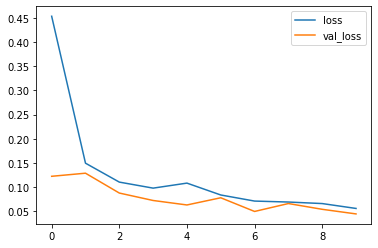

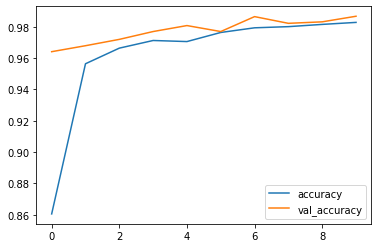

In [9]:
# Plot learning curves
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();